<a href="https://colab.research.google.com/github/carer70-C/IAM3/blob/main/IAM_Carlos_Isaza_Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$Aprendizaje\ de\ M√°quina\\
Parcial\ 2\\ 
14\ de\ Julio\ de\ 2021\\
Profesor:\ Francisco\ Gomez\\
Estudiante:\ Carlos\ Ernesto\ Isaza\ Cavajal$

In [8]:
from matplotlib import pyplot as plt
import math as m
import numpy as np

### Ejercicio 1.12

Una amiga se acerca a ti con un problema de aprendizaje. Ella dice que la funci√≥n objetivo $f$ es completamente desconocida, pero tiene 4000 puntos de datos. Ella est√° dispuesta a pagarte para que resuelvas su problema y le produzca una $g$ que se aproxime a $f$. ¬øQu√© es lo mejor que puedes prometerle entre los siguientes?


(a) Despu√©s de aprender, le proporcionar√° una $g$ que le garantizar√° aproximaciones fuera de la muestra.

(b) Despu√©s de aprender, le proporcionar√° una $g$, y con una alta probabilidad de que la $g$ que produzca se aproximar√° a $f$  bastante fuera de la muestra.

(c) Suceder√° una de dos cosas:
(i) Producir√° una hip√≥tesis $g$;
(ii) Declarar√° que fracas√≥.
Si devuelve una hip√≥tesis $g$, entonces con alta probabilidad la $g$ que
que produzca se aproximar√° bien fuera de la muestra.

### Soluci√≥n

Para prometerle algo a nuestra amiga, y no decepcionarla, primero recordemos que por la desigualdad de Hoeffding tenemos que: 
$$Pr\left[|E_{in}(g)-E_{out}(g)|>\epsilon\right]\leq2Me^{-2N\epsilon^{2}}$$
donde $M$ es el tama√±o del espacio de hip√≥tesis, $N$ es el tama√±o de los datos y $\epsilon$ es la tolerancia entre la diferencia de los errores. Sea $\delta$ la tolerancia de la "mala probabilidad", si despejamos $\epsilon$ y $\delta$ de la anterior inecuaci√≥n obtenemos, respectivamente:
$$\epsilon=\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}$$
y
$$\delta=2Me^{-2N\epsilon^{2}}.$$
Observemos como se comporta $\epsilon$ con $M$ cada vez m√°s grande:

In [9]:


N=4000
delta=0.005
M=[100,100000,100000000,100000000000,100000000000000]
epsi=[]
for i in M:
    epsi.append((1/(2*N)*m.log(2*i/delta))**(1/2))
    
    
print(epsi)

[0.036394770800720934, 0.04677658336721245, 0.055240548163306126, 0.0625698615249811, 0.06912638411726797]


Se observa que aun con espacios de hip√≥tesis muy grandes la diferencia de los errores es menor a $0.07$ y que la probabilidad de que esto ocurra es menor o igual al $0.5\%$, lo cual es una tolerancia relativamente baja.

Ahora veamos como se comporta $\delta$ con $\epsilon$ cada vez m√°s grande:

In [10]:

N=4000
delta=[]
M=100000000000000
epsi=[0.07,0.08,0.09,0.1]
for i in epsi:
    delta.append(2*M*np.exp(-2*N*(i**2)))
    
    
print(delta)

[0.0018909772547773083, 1.1618565808665404e-08, 1.4412773721802804e-14, 3.609702775690779e-21]


Se observa que la probabilidad de que los errores se distancien m√°s de $0.07$ es menor al $0.2\%$.

Por tanto le podemos decir a nuestra amiga con toda confianza que si los datos tienen alg√∫n patron, con los $4000$ datos que tiene le podemos garantizar un $g$ que aproxime muy bien a $f$; pero si los datos no tiene un patron o este es demasiado complejo, no le podemos garantizar ninguna $g$. 

Luego, la repuesta correcta es la (c).

### Problema 1.2

Considere el perceptr√≥n en dos dimensiones: $h(X)=sig(W^{T}X)$
donde $W=\left[w_{0},w_{1},w_{2}\right]^{T}$ y $X=\left[1,x_{1},x_{2}\right]^{T}$. T√©cnicamente, $X$ tiene tres coordenadas, pero llamamos a este perceptr√≥n bidimensional porque la primera coordenada est√° fija en $1$.

### (a)

Muestre que las regiones en el plano donde $h(X)=+1$ y $h(X)=-1$ est√°n separadas por una l√≠nea. Si expresamos esta recta mediante la ecuaci√≥n $x_{2}=ax_{1}+b$, ¬øcu√°les son la pendiente $a$ y la intersecci√≥n $b$ en t√©rminos de $w_{0},w_{1}$ y $w_{2}$?

### Soluci√≥n

Note que por definici√≥n, 
$$h(X)=sig(W^{T}X)=\left\lbrace\begin{array}{c} 1~si~w_{0}+w_{1}x_{1}+w_{2}x_{2}>0 \\ -1~si~w_{0}+w_{1}x_{1}+w_{2}x_{2}<0 \end{array}\right.$$

Por lo que el plano $w_{0}+w_{1}x_{1}+w_{2}x_{2}=0$ separa las $X$ tales que $h(X)=+1$ de las $X$ tales que $h(X)=-1$. Despejando $x_{2}$ de la anterior ecuaci√≥n, tenemos que

$$x_{2}=-\frac{w_{1}}{w_{2}}x_{1}-\frac{w_{0}}{w_{2}}$$

por lo que $a=-\frac{w_{1}}{w_{2}}$ y $b=-\frac{w_{0}}{w_{2}}$.

### (b) 

Haga un dibujo para los casos $W=\left[1,2,3\right]^{T}$ y $W=\left[-1,-2,-3\right]^{T}$.

En m√°s de dos dimensiones, las regiones $+1$ y $-1$ est√°n separadas por un hiperplano, la generalizaci√≥n de una l√≠nea. 

### Soluci√≥n

Note que con $W=\left[1,2,3\right]^{T}$, obtenemos la ecuaci√≥n $x_{2}=-\frac{2}{3}x_{1}-\frac{1}{3}$; y con $W=\left[-1,-2,-3\right]^{T}$ t√°mbien obtenemos la misma ecuaci√≥n, $x_{2}=-\frac{-2}{-3}x_{1}-\frac{-1}{-3}=-\frac{2}{3}x_{1}-\frac{1}{3}$. Ahora grafiquemos:

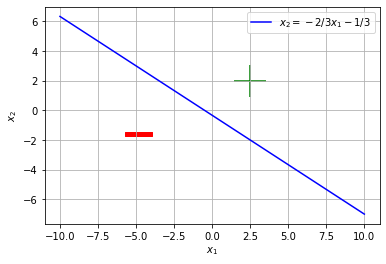

In [11]:
#Se define una funci√≥n que genere los valores de x2, se ingresa un vector de pesos W, los valores de x1, y devuelve los 
#valores x2
def recta(W,x1):
    x2 = [i*(-W[1]/W[2])-W[0]/W[2] for i in x1]
    return x2
#Se definen los datos de entrada para la funci√≥n recta
x1 = list(range(-10,11))
W=[1,2,3]
x2=recta(W,x1)

#Se grafica
plt.plot(x1, x2,'b', label="$x_{2}=-2/3x_{1}-1/3$")
plt.scatter(-5,-2,marker='$-$',s=1000,c='red')
plt.scatter(2.5,2,marker='+',s=1000,c='g')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()

### Problema 1.4

En el ejercicio 1.4, usamos un conjunto de datos artificiales para estudiar el algoritmo de aprendizaje del perceptr√≥n. Este problema lo lleva a explorar m√°s el algoritmo con conjuntos de datos de diferentes tama√±os y dimensiones.

### (a) 
Genere un conjunto de datos separables linealmente de tama√±o $20$ como se indica en el ejercicio 1.4. Grafique los ejemplos $\{(x_{n}, y_{n})\}$ as√≠ como la funci√≥n objetivo $f$ en un plano. Aseg√∫rese de marcar los ejemplos de diferentes clases de manera diferente y agregue etiquetas a los ejes del gr√°fico.

### Soluci√≥n

En el ejercicio 1.4 se pide que se elija al azar una recta que divida el plano, √©sta ser√° nustra funci√≥n objetivo $f$, y apartir de √©sta generar los puntos linealmente separables. El siguiente codigo soluciona este punto.

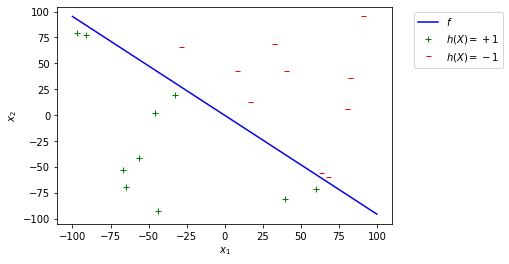

In [12]:
#Se define una funci√≥n que genere f, la entrada es la dimensi√≥n, los rangos de los pesos y la salida es el vector de pesos Wf 
def W_f(dim,mino,maximo):
    W=np.random.randint(mino*10,maximo*10, size=(dim+1, 1))
    return W.flatten()/10
#Se define una funci√≥n que cree un conjunto de datos separables. Sus entrdas son un numero par 
#de datos (N), el vector de pesos Wf y el el rango de los puntos a evaluar.
def datos_separbles(N,Wf,mino,maximo):
    dim_aux=len(Wf)
    negativos=[]
    positivos=[]
    while True:
        # se crea un vector con una dim m√°s para utilizar el ultimo espacio como marcador de 1 o -1
        x1aux=np.random.randint(mino*10,maximo*10, size=(dim_aux+1,1 ))/10
        x1aux[0]=1        
        eva=np.dot(Wf.flatten(), x1aux[0:-1].flatten())
        if eva>0 and len(positivos)<N/2:
            x1aux[-1]=1
            positivos.append(x1aux.flatten())
        if eva<0 and len(negativos)<N/2:
            x1aux[-1]=-1
            negativos.append(x1aux.flatten())
        if len(positivos) == N/2 and len(negativos) == N/2:
            break
    return np.asarray(positivos),np.asarray(negativos),np.asarray(positivos+negativos)

#Se definen los datos para graficar f
dim=2
mino=-100
maximo=100
Wf=W_f(dim,mino,maximo)
x1 = list(range(-100,101))
x2_f=recta(Wf,x1)
N=20

#Se definen los datos para graficar los puntos separables
dSepar=datos_separbles(N,Wf,mino,maximo)
positivosx1=[]
positivosx2=[]
negativosx1=[]
negativosx2=[]

for i in dSepar[0]:
    positivosx1.append(i[1])
    positivosx2.append(i[2])
for i in dSepar[1]:
    negativosx1.append(i[1])
    negativosx2.append(i[2])



    
#Se grafican los resultados
plt.plot(x1, x2_f,'b', label="$f$")
plt.plot(positivosx1,positivosx2,marker='+',linewidth=0,c='g',label="$h(X)=+1$")
plt.plot(negativosx1,negativosx2,marker='$-$',linewidth=0,c='r',label="$h(X)=-1$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()


### (b) 

Ejecute el algoritmo de aprendizaje del perceptr√≥n en el conjunto de datos anterior. Informe el n√∫mero de actualizaciones que realiza el algoritmo antes de converger. Grafique el conjunto de datos $\{(xn, yn)\}$, la funci√≥n objetivo $f$, y la hip√≥tesis final $g$ en la misma figura. Comente si $f$ est√° cerca de $g$.

### Soluci√≥n

En el siguiente c√≥digo se crea la funci√≥n del perceptr√≥n y se grafican los datos pedidos.

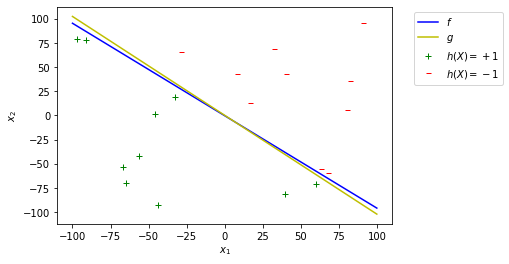

Wf=[-14.8 -59.5 -62.3], Wg=[  8.  -47.9 -46.9], Actulizaciones=7,cos(Œò)=0.9580047358027388


In [13]:
#Se define una funci√≥n con entrada los datos  serapables (dSepar), el rango de los datos y la dimensi√≥n de los datos,
# la salida son los pesos obtenidos por el algoritmo del perceptr√≥n junto don el numero de actualizaciones
def perceptron(dSepar,mino,maximo,dim):
    actuali=0    
    w0=[1]*(dim+1)#se inicializa w0
    while True:
        parada=0    
        #Se evaluan todos los puntos, si w0 calsifica mal alguno, se actualiza w0 y se vuelven a evaluar los puntos
        #desde el principio
        for i in dSepar[2]:        
            parada+=1
            eva=np.dot(w0, i[0:-1].flatten())            
            if eva*i[-1]<0 and i[-1]==1:            
                w0=w0+i[0:-1].flatten()            
                actuali+=1
                break
            if eva*i[-1]<0 and i[-1]==-1:
                w0=w0-i[0:-1].flatten()            
                actuali+=1
                break       
        if parada==len(dSepar[2]):        
            break
    
    return w0,actuali
    

Aux=perceptron(dSepar,mino,maximo,dim)
Wg=Aux[0]
actuali=Aux[1]

#Se definen los datos para graficar g
x2_g=recta(Wg,x1)

#Se grafica los datos
plt.plot(x1, x2_f,'b', label="$f$")
plt.plot(x1, x2_g,'y', label="$g$")
plt.plot(positivosx1,positivosx2,marker='+',linewidth=0,c='g',label="$h(X)=+1$")
plt.plot(negativosx1,negativosx2,marker='$-$',linewidth=0,c='r',label="$h(X)=-1$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()
print(f'Wf={Wf}, Wg={Wg}, Actulizaciones={actuali},cos(Œò)={np.dot(Wf.flatten(), Wg.flatten())/(np.linalg.norm(Wf)*np.linalg.norm(Wg))}')

Entre m√°s cercano a $1$ sea el coseno del angulo de los pesos que definen a $f$ y a $g$, estas se parecen m√°s.

### (c) 

Repita todo en (b) con otro conjunto de datos generado aleatoriamente de tama√±o 20. Compare sus resultados con (b).

### Soluci√≥n

Acontinuaci√≥n se repite el proceso en (b), mateniendo la misma $f$ pero con un conjunto de tados diferente.

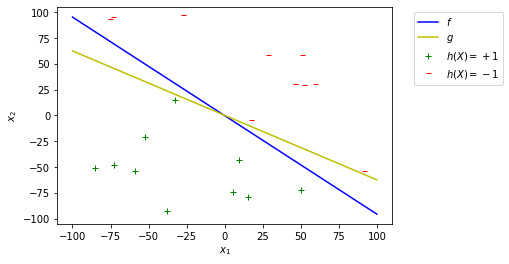

Wf=[-14.8 -59.5 -62.3], Wg=[   4.   -67.1 -107.4], Actulizaciones=3,cos(Œò)=0.9593024045184967


In [14]:
#Se definen los datos para graficar los puntos separables
dSepar=datos_separbles(N,Wf,mino,maximo)
positivosx1=[]
positivosx2=[]
negativosx1=[]
negativosx2=[]

for i in dSepar[0]:
    positivosx1.append(i[1])
    positivosx2.append(i[2])
for i in dSepar[1]:
    negativosx1.append(i[1])
    negativosx2.append(i[2])

Aux=perceptron(dSepar,mino,maximo,dim)
Wg=Aux[0]
actuali=Aux[1]

#Se definen los datos para graficar g
x2_g=recta(Wg,x1)

#Se grafica los datos
plt.plot(x1, x2_f,'b', label="$f$")
plt.plot(x1, x2_g,'y', label="$g$")
plt.plot(positivosx1,positivosx2,marker='+',linewidth=0,c='g',label="$h(X)=+1$")
plt.plot(negativosx1,negativosx2,marker='$-$',linewidth=0,c='r',label="$h(X)=-1$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()
print(f'Wf={Wf}, Wg={Wg}, Actulizaciones={actuali},cos(Œò)={np.dot(Wf.flatten(), Wg.flatten())/(np.linalg.norm(Wf)*np.linalg.norm(Wg))}')


Al comparar los resultados con (b) se observa que el numero de actualizaciones y el parecido de las funciones se ve afectado por el conjunto de datos separables. Sin embargo al correr el anterior codigo varias veces se observa que el numero de actualizaciones solo difiere en unas pocas unidades, al contrario, el parecido de las funciones varia bastante, aveces separecen m√°s que en (b) y aveces menos.

### (d) 

Repita todo en (b) con otro conjunto de datos generado aleatoriamente de tama√±o 100. Compare sus resultados con (b).

### Soluci√≥n

Se repite lo hecho en (b) y (c) manteniendo la misma $f$ pero con una tama√±o de $N=100$ en vez de $20$.

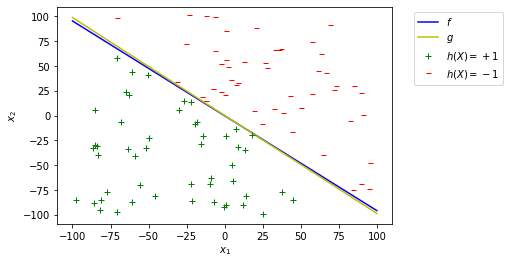

Wf=[-14.8 -59.5 -62.3], Wg=[   8.  -114.8 -116.4], Actulizaciones=9,cos(Œò)=0.9759815798997293


In [15]:

N=100

#Se definen los datos para graficar los puntos separables
dSepar=datos_separbles(N,Wf,mino,maximo)
positivosx1=[]
positivosx2=[]
negativosx1=[]
negativosx2=[]

for i in dSepar[0]:
    positivosx1.append(i[1])
    positivosx2.append(i[2])
for i in dSepar[1]:
    negativosx1.append(i[1])
    negativosx2.append(i[2])

Aux=perceptron(dSepar,mino,maximo,dim)
Wg=Aux[0]
actuali=Aux[1]

#Se definen los datos para graficar g
x2_g=recta(Wg,x1)

#Se grafica los datos
plt.plot(x1, x2_f,'b', label="$f$")
plt.plot(x1, x2_g,'y', label="$g$")
plt.plot(positivosx1,positivosx2,marker='+',linewidth=0,c='g',label="$h(X)=+1$")
plt.plot(negativosx1,negativosx2,marker='$-$',linewidth=0,c='r',label="$h(X)=-1$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()
print(f'Wf={Wf}, Wg={Wg}, Actulizaciones={actuali},cos(Œò)={np.dot(Wf.flatten(), Wg.flatten())/(np.linalg.norm(Wf)*np.linalg.norm(Wg))}')


Aqu√≠ vemos que, con un tama√±o de $100$ de datos, hay m√°s actulizaciones actualizaciones que en (b) pero no un aumento significativamente grande; al ejecutar el codigo anterior varias veces se observa que el parecido de las funciones si aument√≥ comparado con (b), esto puede deberse a que con mayor cantidad de puntos las $g$ tiene un menor grado de libertad.

### (e) 

Repita todo en (b) con otro conjunto de datos generado aleatoriamente de tama√±o 1,000. Compare sus resultados con (b).

### Soluci√≥n

Se repite lo hecho en (b), (c) y (d) manteniendo la misma $f$ pero con una tama√±o de $N=1000$ en vez de $20$.
#### Nota:
En este punto el tiempo de ejecuci√≥n aument√≥ drasticamente. Para mejorarlo se modifica la funci√≥n del perceptr√≥n inicializando w0 en un peso aleatorio, con esta modificaci√≥n el tiempo paso de minutos a segundos.

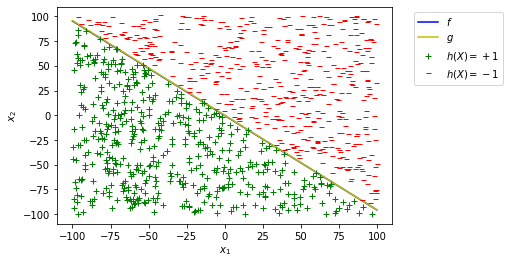

Wf=[-14.8 -59.5 -62.3], Wg=[   54.5 -3963.7 -4142. ], Actulizaciones=14386,cos(Œò)=0.9839072497262593


In [16]:
def perceptron(dSepar,mino,maximo,dim):
    actuali=0    
    w0=W_f(dim,mino,maximo)#se crea un vector de pesos aleatorio
    while True:
        parada=0    
        for i in dSepar[2]:        
            parada+=1
            eva=np.dot(w0.flatten(), i[0:-1].flatten())            
            if eva*i[-1]<0 and i[-1]==1:            
                w0=w0.flatten()+i[0:-1].flatten()            
                actuali+=1
                break
            if eva*i[-1]<0 and i[-1]==-1:
                w0=w0.flatten()-i[0:-1].flatten()            
                actuali+=1
                break       
        if parada==len(dSepar[2]):        
            break
    
    return w0,actuali
N=1000

#Se definen los datos para graficar los puntos separables
dSepar=datos_separbles(N,Wf,mino,maximo)
positivosx1=[]
positivosx2=[]
negativosx1=[]
negativosx2=[]

for i in dSepar[0]:
    positivosx1.append(i[1])
    positivosx2.append(i[2])
for i in dSepar[1]:
    negativosx1.append(i[1])
    negativosx2.append(i[2])

Aux=perceptron(dSepar,mino,maximo,dim)
Wg=Aux[0]
actuali=Aux[1]

#Se definen los datos para graficar g
x2_g=recta(Wg,x1)

#Se grafica los datos
plt.plot(x1, x2_f,'b', label="$f$")
plt.plot(x1, x2_g,'y', label="$g$")
plt.plot(positivosx1,positivosx2,marker='+',linewidth=0,c='g',label="$h(X)=+1$")
plt.plot(negativosx1,negativosx2,marker='$-$',linewidth=0,c='r',label="$h(X)=-1$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()
print(f'Wf={Wf}, Wg={Wg}, Actulizaciones={actuali},cos(Œò)={np.dot(Wf.flatten(), Wg.flatten())/(np.linalg.norm(Wf)*np.linalg.norm(Wg))}')


Hay una cantidad de actualizaciones mucho mayor que en (b), pasa de unas unidades a miles, y las funciones se parecen pero no mucho m√°s que algunos resultados en (d).

### (f)

Modifique el algoritmo de modo que tome $X_{n}\in  \mathbb{R}^{10}$ en lugar de $\mathbb{R}^2$. Genere aleatoriamente un conjunto de datos separables linealmente de tama√±o 1000 con $X_{n}\in  \mathbb{R}^{10}$ y alimente el conjunto de datos al algoritmo. ¬øCu√°ntas actualizaciones necesita el algoritmo para converger?

### Soluci√≥n

Se procede como en (e) pero con $dim=10$ en vez de $2$, y naturalmente con una nueva funci√≥n abjetivo, se descarta la grafica.

In [17]:
dim=10
mino=-100
maximo=100
Wf=W_f(dim,mino,maximo)
N=1000
dSepar=datos_separbles(N,Wf,mino,maximo)
Aux=perceptron(dSepar,mino,maximo,dim)
Wg=Aux[0]
actuali=Aux[1]
print(f'Wf={Wf}\nWg={Wg}\nActulizaciones={actuali}\ncos(Œò)={np.dot(Wf.flatten(), Wg.flatten())/(np.linalg.norm(Wf)*np.linalg.norm(Wg))}')

Wf=[-28.3 -14.4 -58.1 -29.7  64.3 -56.9 -60.8 -85.   13.1 -43.7  57.1]
Wg=[ 4081.  -1461.5 -6660.7 -3516.4  7413.2 -6546.  -7040.7 -9781.9  1484.7
 -5181.5  6693.5]
Actulizaciones=22002
cos(Œò)=0.9304997589224894


Al ejecutar el c√≥digo anterior varias veces se observa que hay un aumento significativo en el numero de actualizaciones, pero el parecido de las funciones varia bastante.

### (g) 

Repita el algoritmo en el mismo conjunto de datos que (f) para 100 experimentos. En las iteraciones de cada experimento, elija $x(t)$ de forma aleatoria en lugar de determinista. Trace un histograma para el n√∫mero de actualizaciones que el algoritmo necesita para converger.

### Soluci√≥n

Se procede 100 veces como en  (f), dejando el mismo conjunto de datos y el la misma funci√≥n objetivo $f$.

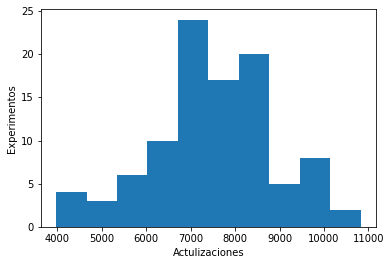

In [18]:
import random
# Se modifica la funci√≥n perceptron para que tome los datos de dSepar de forma aleatoria
def perceptron2(dSepar,mino,maximo,dim):
    actuali=0    
    w0=W_f(dim,mino,maximo)#se crea un vector de pesos aleatorio
    
    while True:
        
        parada=0 
        indices=list(range(len(dSepar[2])))
        for i in range(len(dSepar[2])):        
            parada+=1
            azar=random.choice(indices)
            eva=np.dot(w0.flatten(), dSepar[2][azar][0:-1].flatten())            
            if eva*dSepar[2][azar][-1]<0 and dSepar[2][azar][-1]==1:            
                w0=w0.flatten()+dSepar[2][azar][0:-1].flatten()            
                actuali+=1
                break
            if eva*dSepar[2][azar][-1]<0 and dSepar[2][azar][-1]==-1:
                w0=w0.flatten()-dSepar[2][azar][0:-1].flatten()            
                actuali+=1
                break
            indices.remove(azar)
        if parada==len(dSepar[2]):        
            break
    
    return w0,actuali

#Se corre el experiemnto 100 veces y se almacenan los numero de actualizaciones 
actualizaciones=[]
for i in range(99):
    Aux=perceptron2(dSepar,mino,maximo,dim)
    actuali=Aux[1]
    actualizaciones.append(actuali)
# Se grafica el histograma
plt.hist(actualizaciones)
plt.xlabel('Actulizaciones')
plt.ylabel('Experimentos')
plt.show()

### (h) 

Resuma sus conclusiones con respecto a la precisi√≥n y el tiempo de ejecuci√≥n en funci√≥n de N y dim. 

### Soluci√≥n

De los items (b) a (e) se observa que a mayor n√∫mero de datos, se necesitan m√°s actualizaciones en el algoritmo del perceptr√≥n; la precision varia de experimento en experimento pero parece depender del tama√±o de los datos, a mayor cantidad de datos $g$ tienen menos "libertad de movimiento" y se acercan m√°s a $f$. En el item (f), al cambiar la dimensi√≥n a 10, el problema aumenta en complejidad pasando de cientos de actualizaciones, aveces algunos miles (con dim=2), a varios miles de actualizaciones; esto se ve reflejado en el histograma del punto (g).

### Problema 1.6 

Considere una muestra de 10 canicas extra√≠das independientemente de un recipiente que contiene canicas rojas y verdes. La probabilidad de sacar una canica roja es $\mu$.
Para $\mu=0.05$, $\mu=0.5$ y $\mu=0.8$, calcule la probabilidad de no obtener canicas rojas (v=0, con v la fracci√≥n de canicas roja en la muestra) en los siguientes casos.

### (a)

Extraemos solo una de esas muestras. Calcule la probabilidad de que v=0.

### Soluci√≥n

Para que v sea igual a 0, cada canica que se extraiga debe ser verde; la probabilidad de sacar una canica verde es $1-\mu$; como cada canica es extra√≠da independientemente, las probabilidades de sacar una canica verde se multiplican, entonces $P\left[v=0\right]=(1-\mu)^{10}$. A continuaci√≥n se calculan las probabilidades pedidas.

In [19]:
mu=[0.05,0.5,0.8]
Pv0=[(1-i)**(10) for i in mu]
for i in range(3):
    print(f'P[v=0]={Pv0[i]}, con ùúá={mu[i]}')

P[v=0]=0.5987369392383787, con ùúá=0.05
P[v=0]=0.0009765625, con ùúá=0.5
P[v=0]=1.0239999999999978e-07, con ùúá=0.8


### (b) 

Extraemos 1000 muestras independientes. Calcule la probabilidad de que (al menos) una de las muestras tenga v=0.

### Solucion

Note que, como las muestras son independientes, la probabilidad de que todas las muestras v=0 es de $P\left[v=0\right]^{1000}=\left[(1-\mu)^{10}\right]^{1000}$; la probabilidad de que ninguna de las muestras tenga v=0 es de $\left[1-P\left[v=0\right]\right]^{1000}=\left[1-(1-\mu)^{10}\right]^{1000}$; luego, la probabilidad de que alguna de las muestras tenga v=0 es de $1-\left[1-P\left[v=0\right]\right]^{1000}=1-\left[1-(1-\mu)^{10}\right]^{1000}$. A continuaci√≥n se calculan las probabilidades pedidas.

In [20]:
Pv0=[1-(1-(1-i)**(10))**(1000) for i in mu]
for i in range(3):
    print(f'P[v=0]={Pv0[i]}, con ùúá={mu[i]}')

P[v=0]=1.0, con ùúá=0.05
P[v=0]=0.623576201943276, con ùúá=0.5
P[v=0]=0.00010239476257623004, con ùúá=0.8


### (c)

Repita (b) para 1000000 muestras independientes.

### Soluci√≥n

En este caso la probabilidad de que alguna muestra tenga v=0 es $1-\left[1-P\left[v=0\right]\right]^{1000000}=1-\left[1-(1-\mu)^{10}\right]^{1000000}$. A continuaci√≥n se calculan las probabilidades pedidas.

In [21]:
Pv0=[1-(1-(1-i)**(10))**(1000000) for i in mu]
for i in range(3):
    print(f'P[v=0]={Pv0[i]}, con ùúá={mu[i]}')

P[v=0]=1.0, con ùúá=0.05
P[v=0]=1.0, con ùúá=0.5
P[v=0]=0.09733159268316072, con ùúá=0.8


En este problema vemos como la probabilidad de que alguna muestra tenga v=0, es decir que todas las canicas sean verdes, aumenta cuando lo intentamos varias veces. Esto nos recuerda que la desiguladad de Hoeffding solo funciona para un solo experimento, es decir para una sola hip√≥tesis, no cuando elegimos una de varias. 

### Problem 1.12 

Este problema investiga c√≥mo cambiar la medida del error puede cambiar el resultado del proceso de aprendizaje. Tiene N puntos de datos $y_{1}\leq...y_{N}$ y desea estimar un valor "representativo" (se entiende por representativo a encotrar una hipotesis $h$ que se a juste a los datos).

### (a)

Si su algoritmo es encontrar la hip√≥tesis $h$ que minimiza la suma de las desviaciones cuadradas dentro de la muestra, 

$$E_{in}(h)=\sum_{n=1}^{N}(h-y_n)^2$$

entonces demuestre que su estimaci√≥n ser√° la media de la muestra,

$$h_{mean} = \frac{1}{N} \sum_{n=1}^{N}y_n$$

### Soluci√≥n 

Como $E_{in}(h)$ es una funci√≥n convexa, es m√°s, es un paraboloide que abre hacia arriba, entonces existe un $h$ donde la funci√≥n se hace m√≠nima. Para encontrar esa (h) basta derivar $E_{in}(h)$ con respcto a $h$, igualar a cero y despejar $h$.

$$\frac{\partial{E_{in}(h)}}{\partial{h}}= \sum_{n=1}^{N}2(h-y_n) $$
$$\sum_{n=1}^{N}2(h-y_n)=0$$
$$h=\frac{1}{N}\sum_{n=1}^{N}y_n$$

Para dar un ejemplo en el plano el siguiente c√≥digo asume que $h$ no var√≠a con $y_{i}$, grafica $E_{in}(h)$ y $h_{mean}$.

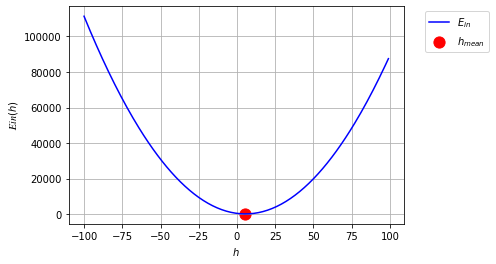

In [22]:
y=[1,2,3,4,5,6,7,8,9,10]
h=list(range(-100,100))

def E_in(h,y):
    suma=0
    for i in y:
        suma+=(h-i)**2
    return suma
def h_mean(y):
    return 1/len(y)*sum(y)
h_mean=h_mean(y)
x2=[]
for i in h:
    x2.append(E_in(i,y))
plt.plot(h,x2,'b',label="$E_{in}$")
plt.grid()
plt.scatter(h_mean,E_in(h_mean,y),marker='.',s=500,c='r',label="$h_{mean}$")
plt.xlabel('$h$')
plt.ylabel('$ùê∏ùëñùëõ(‚Ñé)$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### (b)

Si su algoritmo es encontrar la hip√≥tesis $h$ que minimiza la suma de las desviaciones absolutas en la muestra,

$$E_{in}(h)=\sum_{n=1}^{N}|h-y_n|$$

entonces muestre que su estimaci√≥n ser√° la mediana de la muestra $h_{med}$, que es cualquier valor para el cual la mitad de los puntos de la muestra son como m√°ximo $h_{med}$ y la mitad de los puntos de la muestra son al menos $h_{med}$.

### Soluci√≥n:

Igual que en (a) la funci√≥n tiene un m√≠nimo y para encontrarlo derivamos con respecto a $h$, igualamos a cero y analizamos para qu√© valores de $h$ la derivada parcial se anula.

$$\frac{\partial{E_{in}(h)}}{\partial{h}}=\sum_{n=1}^{N}\frac{h-y_n}{|h-y_n|}=\sum_{n=1}^{N}sign(h - y_n) ~con ~h ~diferente ~de ~y_n$$
$$\sum_{n=1}^{N}sign(h - y_n)=0$$

para que la √∫ltima igualdad se tenga, la mitad de los sumandos debe ser $1$ y la otra mitad $-1$; por tanto $N$ debe ser par, y en efecto se puede elegir cualquier valor $h_{med}$ tal que $h_{med}$ sea mayor a la mitad de los datos y menor a la otra mitad. Por ejemplo $y_{\frac{N}{2}}+\epsilon$, con $\epsilon$ lo suficientmente peque√±o para que $y_{\frac{N}{2}}+\epsilon<y_{\frac{N}{2}+1}$.

Acontinuacion se ejemplifica este resultado.


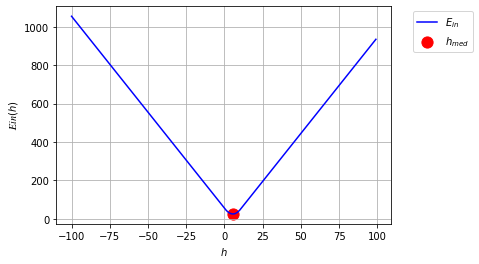

In [23]:
import statistics as stats

y=[1,2,3,4,5,6,7,8,9,10]
h=list(range(-100,100))

def E_in(h,y):
    suma=0
    for i in y:
        suma+=abs(h-i)
    return suma
def h_med(y):
    return stats.median(y)
h_med=h_med(y)
x2=[]
for i in h:
    x2.append(E_in(i,y))
plt.plot(h,x2,'b',label="$E_{in}$")
plt.grid()
plt.scatter(h_med,E_in(h_med,y),marker='.',s=500,c='r',label="$h_{med}$")
plt.xlabel('$h$')
plt.ylabel('$ùê∏ùëñùëõ(‚Ñé)$')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### (c)

Suponga que $y_N$ se perturba a $y_N + \delta$, donde $\delta \to \infty$. Por tanto, $y_N$ es el √∫nico punto de la muestra que se convierte en un valor at√≠pico. ¬øQu√© sucede con sus dos estimadores $h_{mean}$, y $h_{med}$? 

### Soluci√≥n

Para $h_{mean}$ tenemos que,
$$h_{mean}=\frac{\delta}{N}+\frac{1}{N}\sum_{n=1}^{N}y_n$$
por tanto se incrementa en $\frac{\delta}{N}$.

Y $h_{med}$ no se modifica porque se tiene la desigualdad $h_{med}<y_N + \delta$.

### ANEXO

El siguiente c√≥digo contiene el llamado de las funciones que generan una $f$ aleatoria, una conjunto de datos separables y el perceptr√≥n, para que se ejecute las veces que se desee y se verifique empiricamente que la funci√≥n del perceptr√≥n funciona bien.

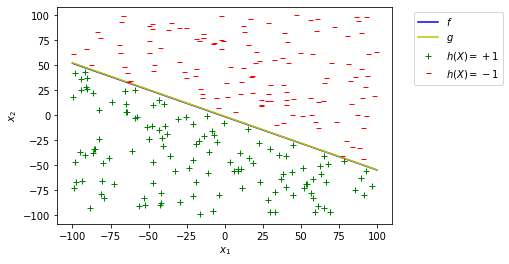

Wf=[-94.3 -35.6 -66.7]
Wg=[-2616.  -1219.8 -2278.8]
Actulizaciones=6281
cos(Œò)=0.9946407480324662


In [24]:
import numpy as np
from matplotlib import pyplot as plt
#Funciones
def recta(W,x1):
    x2 = [i*(-W[1]/W[2])-W[0]/W[2] for i in x1]
    return x2

def W_f(dim,mino,maximo):
    W=np.random.randint(mino*10,maximo*10, size=(dim+1, 1))
    return W.flatten()/10

def datos_separbles(N,Wf,mino,maximo):
    dim_aux=len(Wf)
    negativos=[]
    positivos=[]
    while True:
        # se crea un vector con una dim m√°s para utilizar el ultimo espacio como marcador de 1 o -1
        x1aux=np.random.randint(mino*10,maximo*10, size=(dim_aux+1,1 ))/10
        x1aux[0]=1        
        eva=np.dot(Wf.flatten(), x1aux[0:-1].flatten())
        if eva>0 and len(positivos)<N/2:
            x1aux[-1]=1
            positivos.append(x1aux.flatten())
        if eva<0 and len(negativos)<N/2:
            x1aux[-1]=-1
            negativos.append(x1aux.flatten())
        if len(positivos) == N/2 and len(negativos) == N/2:
            break
    return np.asarray(positivos),np.asarray(negativos),np.asarray(positivos+negativos)

def perceptron(dSepar,mino,maximo,dim):
    actuali=0    
    w0=[1]*(dim+1)#se inicializa w0
    while True:
        parada=0    
        #Se evaluan todos los puntos, si w0 calsifica mal alguno, se actualiza w0 y se vuelven a evaluar los puntos
        #desde el principio
        for i in dSepar[2]:        
            parada+=1
            eva=np.dot(w0, i[0:-1].flatten())            
            if eva*i[-1]<0 and i[-1]==1:            
                w0=w0+i[0:-1].flatten()            
                actuali+=1
                break
            if eva*i[-1]<0 and i[-1]==-1:
                w0=w0-i[0:-1].flatten()            
                actuali+=1
                break       
        if parada==len(dSepar[2]):        
            break
    
    return w0,actuali

# Se establecen los parametros
dim=2
mino=-100
maximo=100
N=250
x1 = list(range(-100,101))

#Se crean los datos para graficar una funci√≥n objetivo aleatoriamente
Wf=W_f(dim,mino,maximo)

x2_f=recta(Wf,x1)

#Se generan los datos para graficar los puntos separables
dSepar=datos_separbles(N,Wf,mino,maximo)

positivosx1=[]
positivosx2=[]
negativosx1=[]
negativosx2=[]

for i in dSepar[0]:
    positivosx1.append(i[1])
    positivosx2.append(i[2])
for i in dSepar[1]:
    negativosx1.append(i[1])
    negativosx2.append(i[2])

# Se generan los datos para graficar g
Aux=perceptron(dSepar,mino,maximo,dim)
Wg=Aux[0]
actuali=Aux[1]
x2_g=recta(Wg,x1)

#Se grafica los datos
plt.plot(x1, x2_f,'b', label="$f$")
plt.plot(x1, x2_g,'y', label="$g$")
plt.plot(positivosx1,positivosx2,marker='+',linewidth=0,c='g',label="$h(X)=+1$")
plt.plot(negativosx1,negativosx2,marker='$-$',linewidth=0,c='r',label="$h(X)=-1$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()
print(f'Wf={Wf}\nWg={Wg}\nActulizaciones={actuali}\ncos(Œò)={np.dot(Wf.flatten(), Wg.flatten())/(np.linalg.norm(Wf)*np.linalg.norm(Wg))}')